In [1]:
import numpy as np
import pandas as pd
import spotipy as sp
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
##!conda install -c conda-forge spotipy
import config
import pandas
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import pprint
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [2]:
audio = pd.read_csv ("combined.csv")

In [3]:
audio

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4
1,0.511,0.532,5,-5.745,1,0.0560,0.16900,0.000000,0.3110,0.322,137.827,audio_features,3k79jB4aGmMDUQzEwa46Rz,spotify:track:3k79jB4aGmMDUQzEwa46Rz,https://api.spotify.com/v1/tracks/3k79jB4aGmMD...,https://api.spotify.com/v1/audio-analysis/3k79...,219724,4
2,0.855,0.678,1,-6.276,1,0.1890,0.05690,0.000037,0.4120,0.852,99.029,audio_features,6WzRpISELf3YglGAh7TXcG,spotify:track:6WzRpISELf3YglGAh7TXcG,https://api.spotify.com/v1/tracks/6WzRpISELf3Y...,https://api.spotify.com/v1/audio-analysis/6WzR...,215467,4
3,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4
4,0.652,0.800,9,-4.019,0,0.0614,0.14300,0.629000,0.1120,0.234,143.978,audio_features,7ro0hRteUMfnOioTFI5TG1,spotify:track:7ro0hRteUMfnOioTFI5TG1,https://api.spotify.com/v1/tracks/7ro0hRteUMfn...,https://api.spotify.com/v1/audio-analysis/7ro0...,231704,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5772,0.700,0.829,8,-6.846,1,0.0669,0.00218,0.000472,0.1200,0.886,148.068,audio_features,5sL7LWGCUUEcP4gLBkFW3N,spotify:track:5sL7LWGCUUEcP4gLBkFW3N,https://api.spotify.com/v1/tracks/5sL7LWGCUUEc...,https://api.spotify.com/v1/audio-analysis/5sL7...,120440,3
5773,0.555,0.614,0,-8.679,1,0.0997,0.81800,0.002410,0.3160,0.244,155.556,audio_features,3FkE7rIbfrkD5JluAGZtlt,spotify:track:3FkE7rIbfrkD5JluAGZtlt,https://api.spotify.com/v1/tracks/3FkE7rIbfrkD...,https://api.spotify.com/v1/audio-analysis/3FkE...,135915,4
5774,0.396,0.594,9,-5.267,0,0.1140,0.38400,0.000000,0.1350,0.211,163.932,audio_features,41v1NkuMJPYcDhM9j2S2v5,spotify:track:41v1NkuMJPYcDhM9j2S2v5,https://api.spotify.com/v1/tracks/41v1NkuMJPYc...,https://api.spotify.com/v1/audio-analysis/41v1...,184756,4
5775,0.570,0.450,2,-7.241,1,0.0271,0.41500,0.000234,0.0793,0.256,125.987,audio_features,29MyBEvj2JpRQD4oDjk7Wa,spotify:track:29MyBEvj2JpRQD4oDjk7Wa,https://api.spotify.com/v1/tracks/29MyBEvj2JpR...,https://api.spotify.com/v1/audio-analysis/29My...,175238,4


In [4]:

# Create a list of columns to exclude
exclude_columns = ['id','type', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']

# Create a new dataframe "audio_x" by dropping the specified columns
audio_x = audio.drop(columns=exclude_columns)

In [5]:
audio_x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994
1,0.511,0.532,5,-5.745,1,0.0560,0.16900,0.000000,0.3110,0.322,137.827
2,0.855,0.678,1,-6.276,1,0.1890,0.05690,0.000037,0.4120,0.852,99.029
3,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056
4,0.652,0.800,9,-4.019,0,0.0614,0.14300,0.629000,0.1120,0.234,143.978
...,...,...,...,...,...,...,...,...,...,...,...
5772,0.700,0.829,8,-6.846,1,0.0669,0.00218,0.000472,0.1200,0.886,148.068
5773,0.555,0.614,0,-8.679,1,0.0997,0.81800,0.002410,0.3160,0.244,155.556
5774,0.396,0.594,9,-5.267,0,0.1140,0.38400,0.000000,0.1350,0.211,163.932
5775,0.570,0.450,2,-7.241,1,0.0271,0.41500,0.000234,0.0793,0.256,125.987


In [6]:
X = audio_x

In [7]:
#scaling

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.105,0.564,169.994
1,0.511,0.532,5,-5.745,1,0.0560,0.1690,0.000000,0.311,0.322,137.827
2,0.855,0.678,1,-6.276,1,0.1890,0.0569,0.000037,0.412,0.852,99.029
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.329,0.775,110.056
4,0.652,0.800,9,-4.019,0,0.0614,0.1430,0.629000,0.112,0.234,143.978


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.338101,0.352414,1.015613,0.568668,0.783094,1.037148,-0.536319,-0.580897,-0.515440,0.373190,1.732874
1,-0.589228,-0.357471,-0.095020,0.560057,0.783094,-0.290393,-0.368440,-0.580957,0.795962,-0.584580,0.603145
2,1.517791,0.252195,-1.205653,0.439725,0.783094,1.457755,-0.730348,-0.580849,1.438931,1.513016,-0.759469
3,0.390781,0.949552,1.570929,0.744747,-1.276986,-0.395544,-0.847218,-0.580957,0.910551,1.208271,-0.372193
4,0.274405,0.761642,1.015613,0.951192,-1.276986,-0.219415,-0.452380,1.266020,-0.470877,-0.932861,0.819172


In [9]:
#choosing k

In [10]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1234)

In [11]:
labels = kmeans.labels_
labels

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [12]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     524
1    2318
2    1401
3    1534
dtype: int64

In [13]:
clusters

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [14]:
X["cluster"] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,1
1,0.511,0.532,5,-5.745,1,0.0560,0.16900,0.000000,0.3110,0.322,137.827,1
2,0.855,0.678,1,-6.276,1,0.1890,0.05690,0.000037,0.4120,0.852,99.029,1
3,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,3
4,0.652,0.800,9,-4.019,0,0.0614,0.14300,0.629000,0.1120,0.234,143.978,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5772,0.700,0.829,8,-6.846,1,0.0669,0.00218,0.000472,0.1200,0.886,148.068,1
5773,0.555,0.614,0,-8.679,1,0.0997,0.81800,0.002410,0.3160,0.244,155.556,1
5774,0.396,0.594,9,-5.267,0,0.1140,0.38400,0.000000,0.1350,0.211,163.932,3
5775,0.570,0.450,2,-7.241,1,0.0271,0.41500,0.000234,0.0793,0.256,125.987,1


In [15]:
kmeans.inertia_

43811.20960117981

In [16]:
kmeans2 = KMeans(n_clusters=7,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

37815.99946190884


In [17]:
#elbow

Training a K-Means model with 2 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

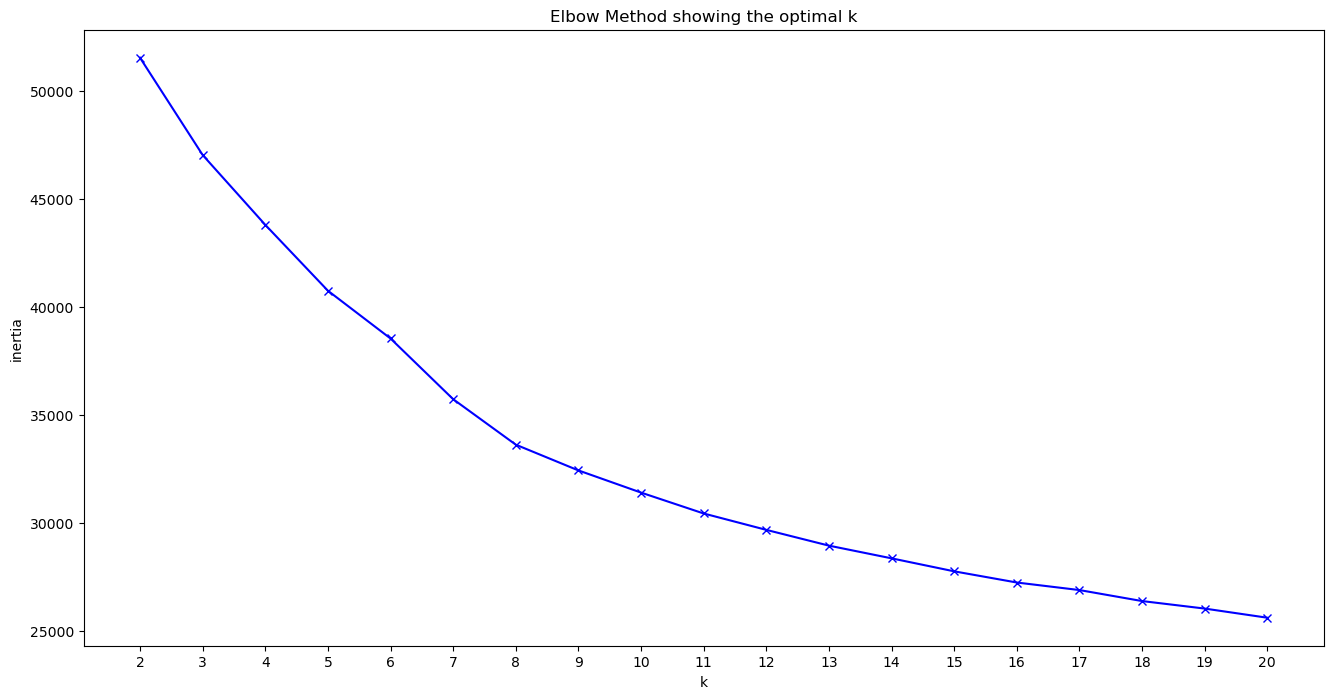

In [18]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [19]:
#silhouette

Calculating silhouette score for K-Means model with 2 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 3 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 4 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 5 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 6 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 7 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 8 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 9 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 10 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 11 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 12 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 13 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 14 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 15 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 16 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 17 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 18 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 19 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Calculating silhouette score for K-Means model with 20 clusters! 



/Users/genevauy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


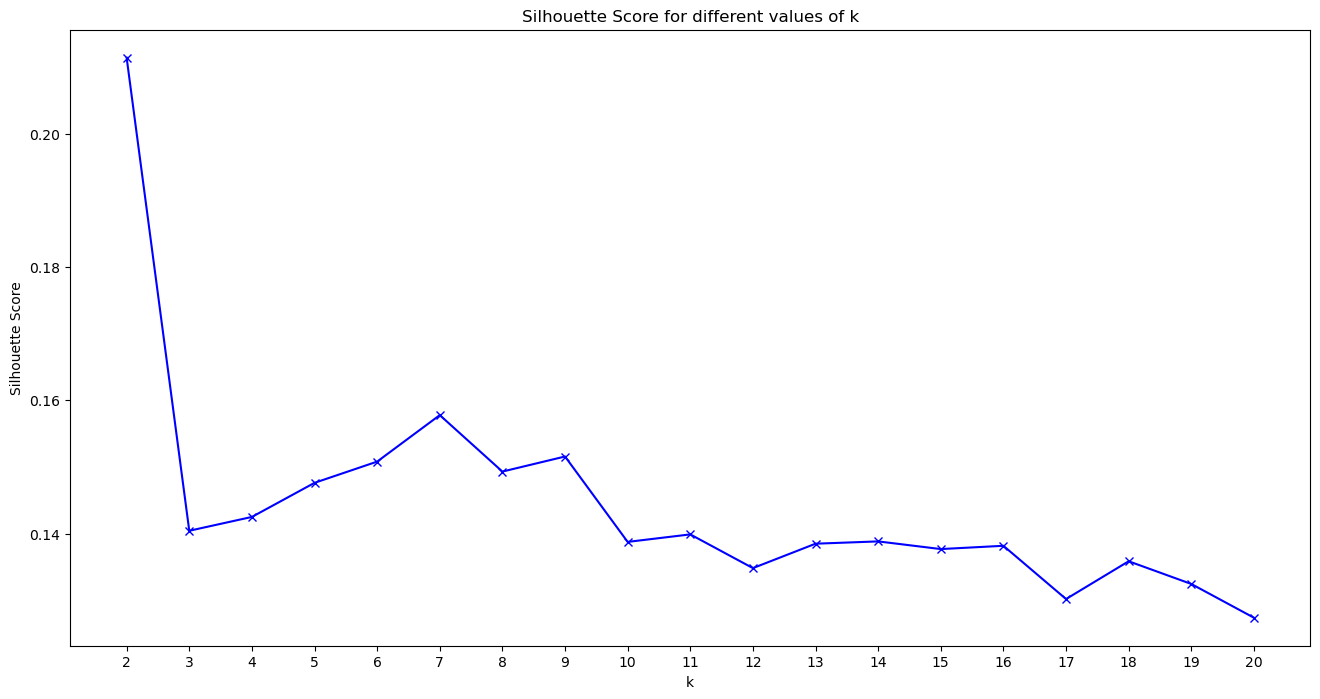

In [20]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in K:
    print("Calculating silhouette score for K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_scaled_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled_df, labels))

plt.figure(figsize=(16,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Score for different values of k')
plt.show()


In [21]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,0.552,0.702,9,-5.707,1,0.1570,0.11700,0.000021,0.1050,0.564,169.994,1
1,0.511,0.532,5,-5.745,1,0.0560,0.16900,0.000000,0.3110,0.322,137.827,1
2,0.855,0.678,1,-6.276,1,0.1890,0.05690,0.000037,0.4120,0.852,99.029,1
3,0.671,0.845,11,-4.930,0,0.0480,0.02070,0.000000,0.3290,0.775,110.056,3
4,0.652,0.800,9,-4.019,0,0.0614,0.14300,0.629000,0.1120,0.234,143.978,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5772,0.700,0.829,8,-6.846,1,0.0669,0.00218,0.000472,0.1200,0.886,148.068,1
5773,0.555,0.614,0,-8.679,1,0.0997,0.81800,0.002410,0.3160,0.244,155.556,1
5774,0.396,0.594,9,-5.267,0,0.1140,0.38400,0.000000,0.1350,0.211,163.932,3
5775,0.570,0.450,2,-7.241,1,0.0271,0.41500,0.000234,0.0793,0.256,125.987,1


In [22]:
audios = pd.concat([X, audio['id']], axis=1)

In [ ]:
audios

In [ ]:
#USER INPUT

In [41]:
import random

billboard = pd.read_csv('billboard100.csv')
user_song = input("Hello! Please enter a song: ")
user_song = user_song.lower()
billboard['Song_lower'] = billboard['song titles'].str.lower()
filtered_df = billboard[billboard['Song_lower'] != user_song]
if user_song in billboard['Song_lower'].values:
    random_title = random.choice(filtered_df['song titles'])
    random_title_search = sp.search(q=random_title, limit=1)
    track_id = random_title_search['tracks']["items"][0]["id"]
    print("Looks like your song is in the top 100. We recommend another one from that list:")
    display(IFrame(src="https://open.spotify.com/embed/track/" + track_id, width="320", height="80",
                   frameborder="0",
                   allowtransparency="true",
                   allow="encrypted-media",
                   ))
else:
    answer = input("Would you like a recommendation? Please answer either yes or no: ")
    if answer.lower() == 'yes':
        results = sp.search(q=user_song, limit=1)
        track_id = results['tracks']["items"][0]["id"]
        song_features = sp.audio_features([track_id])[0]
        user_song = pd.DataFrame(song_features, index=[0])
        exclude = ['type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']
        user = pd.DataFrame([song_features]).drop(columns=exclude)
        user_scaled = scaler.transform(user)
        user_scaled_df = pd.DataFrame(user_scaled, columns=user.columns)
        user_cluster = kmeans2.predict(user_scaled_df)
        recommended_songs = audios[audios['cluster'] == user_cluster[0]]
        if not recommended_songs.empty:
            recommended_track_id = recommended_songs.sample(n=1, random_state=1234)['id'].values[0]
            print("Based on your answer, we recommend you this:")
            display(IFrame(src="https://open.spotify.com/embed/track/" + recommended_track_id, width="320", height="80",
                           frameborder="0",
                           allowtransparency="true",
                           allow="encrypted-media",
                           ))
    else:
        print("Okay")


Hello! Please enter a song: september
Would you like a recommendation? Please answer either yes or no: yes
Based on your answer, we recommend you this:
